**<center>Data Analytics Task</center>**
**Name** -Vraj Nena



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
#Converted pdf to excel using online tool and reading it
data= pd.read_excel('F:\GIT REPO\Feature_Engineering\Practice\Data Analytics  -Indian Stock Market Top 2000 (1).xlsx',skiprows=1)

In [190]:
data.head()

,Name,Ticker,Sub-Sector,Market Cap,Close Price,PE Ratio,Return on Equity,Return on Assets,Net Profit Margin,5Y Avg EBITDA Margin,EBITDA Margin,1Y Return vs Nifty,5Y CAGR,Debt to Equity,Long Term Debt to Equity
0,Reliance Industries Ltd,RELIANCE,Oil & Gas - Refining & Marketing,1.679534e+06,2467.40,34.186904,7.79327701365584,3.95702111893294,9.725370,17.720494,20.4338091627685,2.412295,31.316180,33.855037,22.831210
1,Tata Consultancy Services Ltd,TCS,IT Services & Consulting,1.358569e+06,3626.70,41.892356,37.7406797511885,25.9323822927329,19.383065,29.072528,28.9652204577105,2.801648,23.874994,8.948661,7.465445
2,HDFC Bank Ltd,HDFCBANK,Private Banks,8.206363e+05,1486.50,25.779258,16.4352004229457,1.883433,20.420916,28.206116,28.3420941568116,-16.833310,15.587857,NaN,NaN
3,Infosys Ltd,INFY,IT Services & Consulting,7.775010e+05,1853.05,40.178853,27.135305,19.4178946470591,18.847214,28.656802,29.3066336816885,21.730844,29.114535,6.935219,5.974056
4,ICICI Bank Ltd,ICICIBANK,Private Banks,5.002790e+05,710.75,27.212283,12.3828973275142,1.24333269519827,11.395012,11.900543,16.9635544895708,5.055258,23.506987,NaN,NaN


In [52]:
data.describe() # It will only show columns with numerical values

,Market Cap,Close Price,PE Ratio,Net Profit Margin,5Y Avg EBITDA Margin,1Y Return vs Nifty,5Y CAGR,Debt to Equity,Long Term Debt to Equity
count,2.000000e+03,2000.000000,1.957000e+03,1.953000e+03,1880.000000,2000.000000,1593.000000,1835.000000,1833.000000
mean,1.316900e+04,740.793690,4.560860e+13,-6.268385e+02,-234.927295,110.163582,14.428792,138.629604,76.905454
std,6.659485e+04,2498.262371,2.017633e+15,2.653735e+04,9542.274154,573.152064,29.226935,1361.068722,609.649168
min,1.249950e+02,0.200000,-6.046040e+03,-1.172500e+06,-412176.819645,-99.414554,-53.830928,0.000000,0.000000
25%,3.116762e+02,80.862500,7.035122e+00,9.725617e-01,7.834604,-12.223677,-2.159302,5.496991,0.576822
50%,1.039122e+03,221.150000,2.102286e+01,5.788951e+00,13.405806,24.720576,9.786437,29.957489,8.724391
75%,5.041667e+03,609.062500,4.920941e+01,1.251864e+01,21.054453,99.091815,25.414004,82.965377,37.949665
max,1.679534e+06,66876.350000,8.925604e+16,2.443590e+03,430.283277,18121.401248,344.709661,48909.090909,18638.057009


In [69]:
data.dtypes

Name                         object
Ticker                       object
Sub-Sector                   object
Market Cap                  float64
Close Price                 float64
PE Ratio                    float64
Return on Equity             object
Return on Assets             object
Net Profit Margin           float64
5Y Avg EBITDA Margin        float64
EBITDA Margin                object
1Y Return vs Nifty          float64
5Y CAGR                     float64
Debt to Equity              float64
Long Term Debt to Equity    float64
dtype: object

**Question- 1**
- Firstly, screen the companies and visualise them according to sub-sectors using a pie chart
or a bar charts.

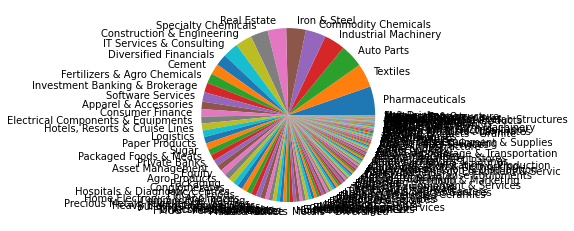

In [96]:
# converting to pie chart 
plt.pie(data['Sub-Sector'].value_counts(),labels=data['Sub-Sector'].value_counts().index)
plt.show()

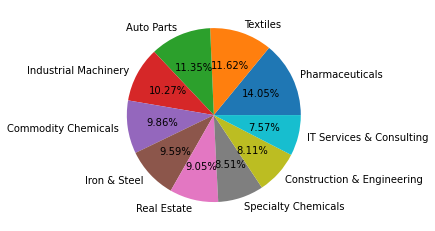

In [131]:
# Too many fields so showing top 10 in pie chart and showing the percentage
plt.pie(data['Sub-Sector'].value_counts()[:10],labels=data['Sub-Sector'].value_counts().index[:10],autopct='%1.2f%%')
plt.show()

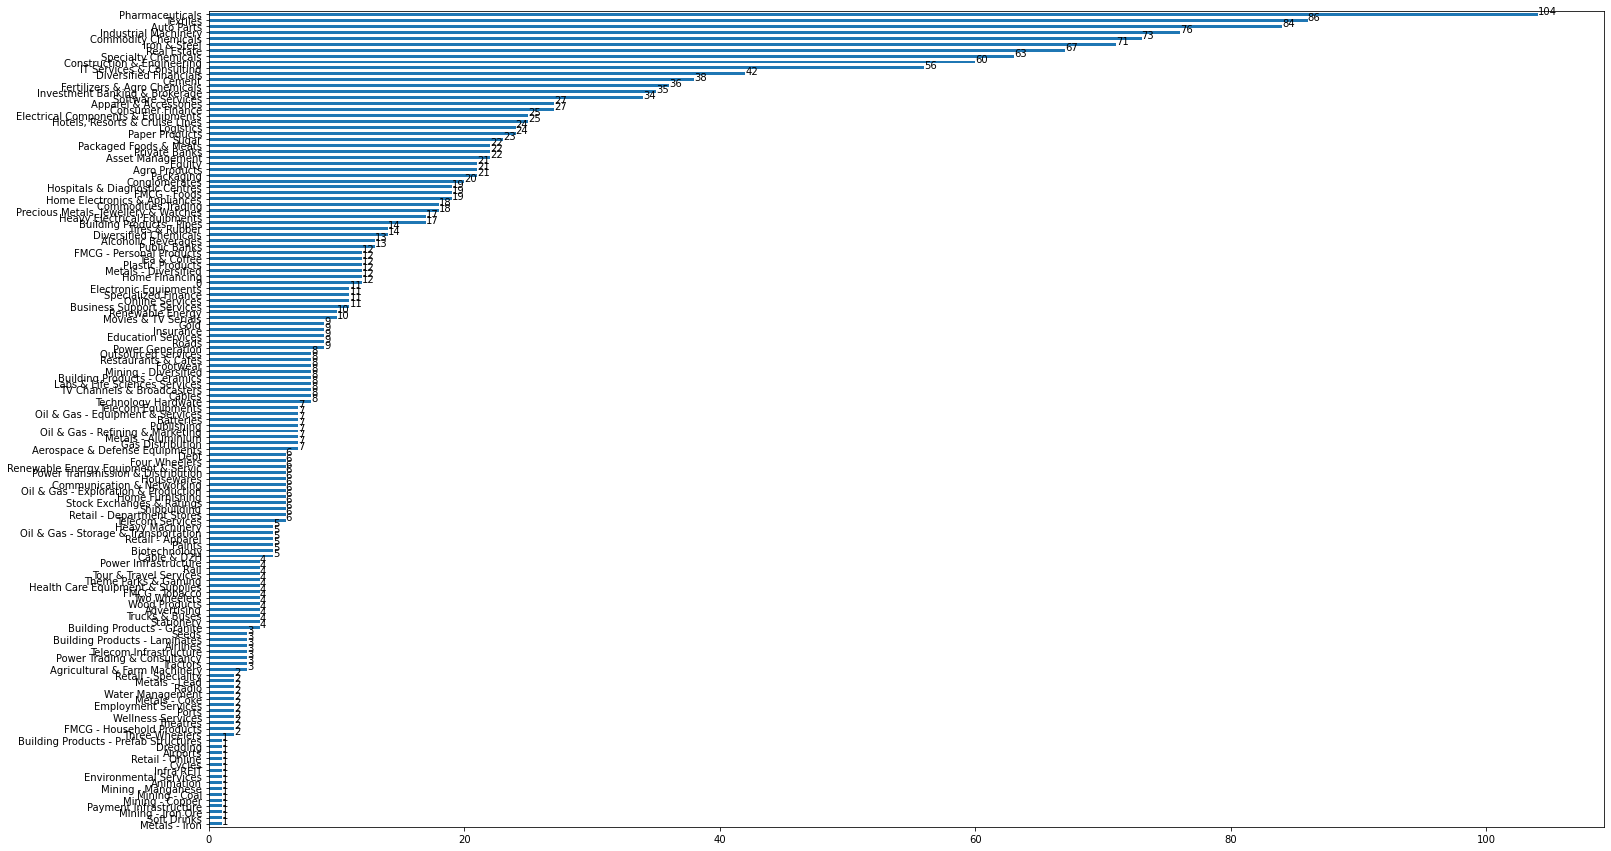

In [135]:
#Visualising using bar chart
data['Sub-Sector'].value_counts().plot(kind='barh',figsize=(25,15)).invert_yaxis() # horizontal bar chart for better visualization
for index ,value in enumerate(data['Sub-Sector'].value_counts()): # showing the count of each Sector
    plt.text(value, index,str(value))

Text(0, 0.5, 'Category of Comapny')

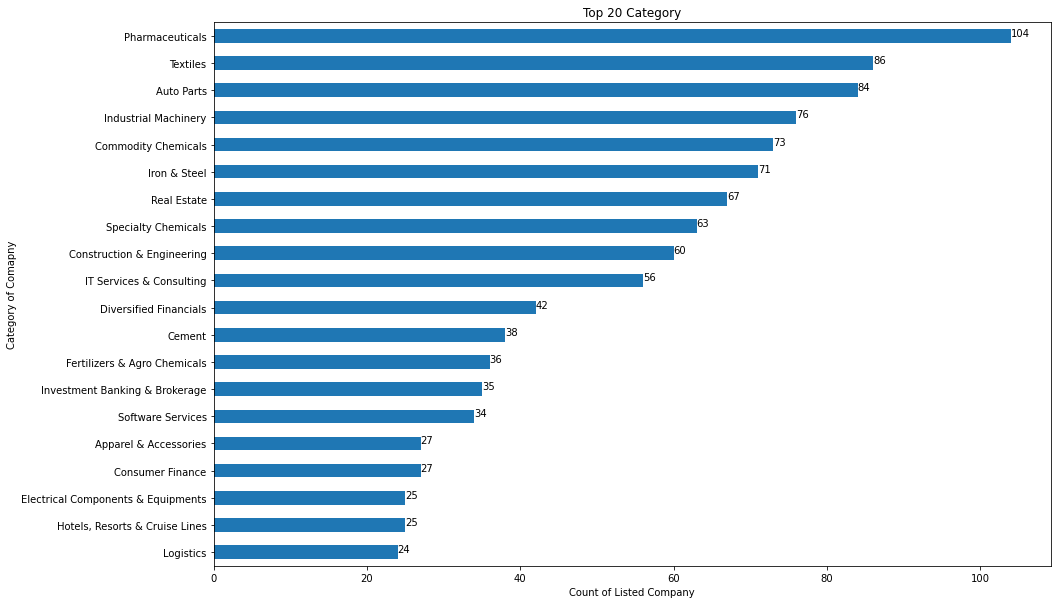

In [242]:
# Visulaising top 20 sector 
data['Sub-Sector'].value_counts()[:20].plot(kind='barh',figsize=(15,10)).invert_yaxis() # we can also use groupby 
for index ,value in enumerate(data['Sub-Sector'].value_counts()[:20]):
    plt.text(value, index,str(value))
plt.title('Top 20 Category')
plt.xlabel('Count of Listed Company')
plt.ylabel('Category of Comapny')
plt.show()


**Question - 2**
- Secondly, visualise the companies by segregating them according to Market Cap in
three categories: Large Cap(>20,000 crore), Mid Cap (5,000 to 20,000 crore) &
Small Cap(<5,000).

In [145]:
# Adding another column  as Market_cap_category in our main data
data_2 = data.copy() # Creating a copy of data so that if we want to get our main data we can easily get


In [146]:
# Looking at the data the Market cap is already in crores
condition = [
    (data_2["Market Cap"]>20000),
    (data_2["Market Cap"] >=5000)   & (data_2['Market Cap'] <=20000),
    (data_2['Market Cap']<5000)]
value= ['Large Cap',"Mid Cap","Small Cap"]

data_2["Market_cap_Category"]=np.select(condition,value)

In [147]:
data_2["Market_cap_Category"].value_counts()

Small Cap    1494
Mid Cap       281
Large Cap     225
Name: Market_cap_Category, dtype: int64

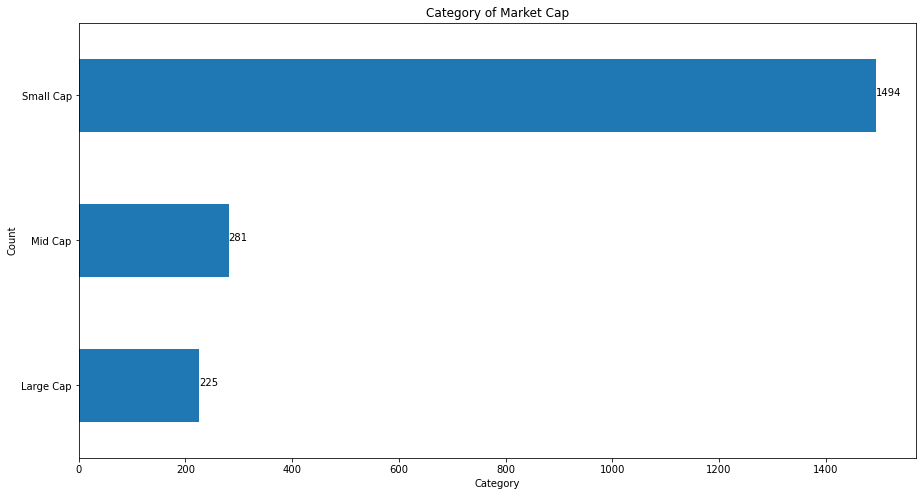

In [153]:
data_2["Market_cap_Category"].value_counts().plot(kind='barh',figsize=(15,8)).invert_yaxis()
plt.title('Category of Market Cap')
plt.xlabel("Category")
plt.ylabel('Count')
for index ,value in enumerate(data_2['Market_cap_Category'].value_counts()):
    plt.text(value, index,str(value))

**Question 3**
- Thirdly, pick 10 random companies from the entire group and visualise the following
through a line chart
- Find the Intrinsic Value of the company based on 3 cases of growth (g): Assume
3 Cases for g (Growth) : Good (15% Growth) ; Bad (-5% Growth); Best (25%Growth)

In [63]:
# Importing table3 from excel sheet to get EPS
table3= pd.read_excel('F:\GIT REPO\Feature_Engineering\Practice\Data Analytics  -Indian Stock Market Top 2000 (1).xlsx',sheet_name='Table 3',skiprows=1)
table3

,Retail Investor Holding,Pledged Promoter Holdings,Insurance Firms Holding,No. of Shareholders,Total Revenue,Net Income,PBT,Earnings Per Share,EBITDA,Long Term Investments,Reserves & Surplus,Cash and Equivalent,Book Value,Free Cash Flow,Operating Cash Flow,Unnamed: 15
0,7.651335,0.000000,6.364201,Market Cap,505153.00,49128,55461,74.653049,103222.00,212382.00,579376.00,169843.00,799432.00,-79652.00,26185.00,NaN
1,3.601120,0.341522,4.459817,1577358,167311.00,32430,43760,87.0436239569868,48462.00,213.00,86063.00,38489.00,87108.00,35727.00,38802.00,NaN
2,9.776550,0.000000,2.887513,1888276,155885.27,31833.2,42796.14,57.8992684343621,44181.15,438823.11,148746.23,121272.52,210442.95,40780.31,42476.46,NaN
3,6.272681,0.000000,3.195299,1897185,102673.00,19351,26628,45.6074229994011,30090.00,11863.00,73627.00,27056.00,76782.00,21117.00,23224.00,NaN
4,6.799743,0.000000,12.664458,1642131,161336.47,18384.31,26028.33,27.4612176128086,27368.40,536578.62,107231.52,147570.54,167175.84,136327.09,138015.30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,41.047264,0.000000,0.000000,7126,63.29,7.85999999999999,10.54,24.7169811320754,12.27,0.00,42.18,7.65,45.36,1.31,6.76,NaN
1996,16.016720,0.000000,0.000000,13167,830.45,13.95,11.69,4.73893399463261,65.98,0.14,144.17,20.66,202.67,-8.33,6.96,NaN
1997,5.397273,0.000000,0.000000,3860,192.38,1.37,1.92,0.711167404654252,17.65,0.00,47.98,0.42,89.14,30.05,32.51,NaN
1998,22.385833,0.000000,0.000000,3988,92.59,8.53,9.14,710.833333333334,19.62,0.99,103.96,6.63,104.77,13.20,22.41,NaN


In [64]:
table3.shape

(2000, 16)

In [65]:
data_3= data.copy()

In [66]:
data_3.shape

(2000, 15)

In [71]:
table3['Earnings Per Share']

0               74.653049
1        87.0436239569868
2        57.8992684343621
3        45.6074229994011
4        27.4612176128086
              ...        
1995     24.7169811320754
1996     4.73893399463261
1997    0.711167404654252
1998     710.833333333334
1999     48.2391746494425
Name: Earnings Per Share, Length: 2000, dtype: object

In [75]:
data_3=pd.merge(data_3, table3['Earnings Per Share'], left_index=True, right_index=True) # mergeging EPS based on index

In [118]:
# Select ten random companies
random_data= data_3.sample(10,random_state=1)

In [119]:
random_data

,Name,Ticker,Sub-Sector,Market Cap,Close Price,PE Ratio,Return on Equity,Return on Assets,Net Profit Margin,5Y Avg EBITDA Margin,EBITDA Margin,1Y Return vs Nifty,5Y CAGR,Debt to Equity,Long Term Debt to Equity,EPS,Earnings Per Share
674,Action Construction Equipment Ltd,ACE,Heavy Machinery,2635.906543,214.10,33.014862,16.5218111083519,7.948589,6.425961,8.463841,10.8083962461568,21.012999,31.963121,10.398441,3.844978,7.035403,7.035403
1699,VIP Clothing Ltd,VIPCLOTHNG,Apparel & Accessories,216.815862,25.40,-208.476791,-0.765719334413204,-0.383452547747221,-0.716895,1.466996,3.37078651685392,60.290137,-13.647362,65.694187,2.317660,-0.125913296660845,-0.125913296660845
1282,Crest Ventures Ltd,CREST,Asset Management,520.630882,181.35,174.708350,0.518558477038999,0.427549695478449,4.190101,39.325688,14.7215973003375,95.882545,2.684778,20.582027,20.582027,1.04745995354972,1.04745995354972
1315,Stovec Industries Ltd,STOVACQ,Industrial Machinery,479.982678,2261.00,16.193748,9.97779422649889,7.51498257839721,12.320738,20.312833,18.3522467473085,10.962981,0.088692,0.000000,0.000000,141.96,141.96
1210,State Trading Corporation of India Ltd,STCINDIA,Commodities Trading,610.500000,102.05,-12.101090,NaN,-2.07596509745103,-16.254793,-3.830804,-10.4488191513355,17.038887,-8.538631,NaN,NaN,-8.40833333333333,-8.40833333333333
1636,Anmol India Ltd,ANMOL,NaN,240.974511,207.60,24.414844,28.5012994513426,6.79073927551684,1.416923,1.857435,2.30411438743575,176.295614,NaN,118.625221,49.583017,9.50607878584158,9.50607878584158
613,India Pesticides Ltd,IPL,Fertilizers & Agro Chemicals,3276.977620,282.25,24.362335,41.6233444733259,30.4745290392741,20.524284,24.102594,28.9134382104765,-16.098752,NaN,7.779604,1.912807,12.0529278641542,12.0529278641542
447,GMM Pfaudler Ltd,GMMPFAUDLR,Industrial Machinery,6420.663787,4327.85,87.510751,17.0723194341028,5.03945985672191,7.160843,16.179406,12.5512395081007,-13.127030,NaN,119.256508,106.381134,50.1932615016248,50.1932615016248
1131,TGV SRAAC Ltd,TGVSL,Commodity Chemicals,754.447641,71.75,26.060368,5.04896361083737,2.12270635895367,2.842136,16.522072,15.6126055370116,161.464111,25.550606,81.770210,44.532210,2.76788115523346,2.76788115523346
808,HBL Power Systems Ltd,HBLPOWER,Batteries,1785.135452,66.75,130.111913,1.76472101458594,1.28296240882737,1.484286,9.066179,7.89095039757666,75.987579,9.787062,8.943162,2.568889,0.494958519193199,0.494958519193199


In [137]:
# AAA bond yied is 4.457% 
# Created a function that gives intrinsic value
def intrinsic_value(EPS,g):
    return ((EPS*(8.5+2*g)*6)/4.457)

In [121]:
random_data['Earnings Per Share']= random_data['Earnings Per Share'].astype(float)

In [138]:
Good_growth= intrinsic_value(random_data['Earnings Per Share'],15)
Bad_growth=intrinsic_value(random_data['Earnings Per Share'],-5)
Excellent_growth=intrinsic_value(random_data['Earnings Per Share'],25)

In [139]:
Good_growth

674      364.634969
1699      -6.525908
1282      54.288366
1315    7357.585820
1210    -435.792013
1636     492.686605
613      624.686187
447     2601.445682
1131     143.455362
808       25.652999
Name: Earnings Per Share, dtype: float64

In [140]:
Bad_growth

674     -14.206557
1699      0.254256
1282     -2.115131
1315   -286.659188
1210     16.978910
1636    -19.195582
613     -24.338423
447    -101.355027
1131     -5.589170
808      -0.999468
Name: Earnings Per Share, dtype: float64

In [141]:
Excellent_growth

674       554.055732
1699       -9.915990
1282       82.490115
1315    11179.708324
1210     -662.177474
1636      748.627699
613       949.198492
447      3952.846037
1131      217.977627
808        38.979233
Name: Earnings Per Share, dtype: float64

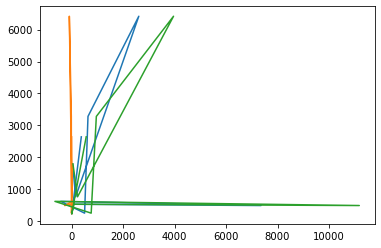

In [142]:
plt.plot(Good_growth,random_data['Market Cap'])
plt.plot(Bad_growth,random_data['Market Cap'])
plt.plot(Excellent_growth,random_data['Market Cap'])

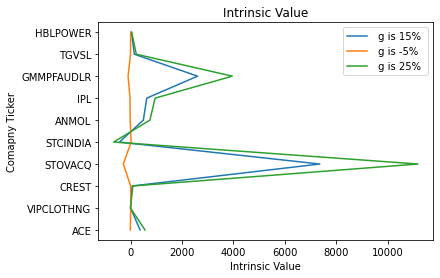

In [143]:
plt.plot(Good_growth,random_data['Ticker'],label=" g is 15% ")
plt.plot(Bad_growth,random_data['Ticker'],label=" g is -5% ")
plt.plot(Excellent_growth,random_data['Ticker'],label=" g is 25% ")
plt.xlabel("Intrinsic Value")
plt.ylabel('Comapny Ticker')
plt.legend()
plt.title("Intrinsic Value")
plt.show()